In [1]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [2]:
TRAIN_IMG_FOLDER = '/content/TRAINNING/'
TEST_IMG_FOLDER = '/content/TEST/'

train_set_files = os.listdir(TRAIN_IMG_FOLDER)
test_set_files = os.listdir(TEST_IMG_FOLDER)

width  = 128
height = 128

FileNotFoundError: ignored

In [ ]:
train_id_file = set([f.split('_')[0] for f in train_set_files])
test_id_file = set([f.split('_')[0] for f in train_set_files])
print(train_id_file <= test_id_file)

True


In [3]:
print('Train Images:')
train_image_names = os.listdir(TRAIN_IMG_FOLDER)
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

Train Images:


FileNotFoundError: ignored

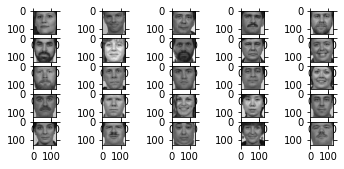

In [ ]:
for i in range(len(train_image_names)):
    img = plt.imread(TRAIN_IMG_FOLDER + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
print('Test Images:')
test_image_names = os.listdir(TEST_IMG_FOLDER)#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

Test Images:


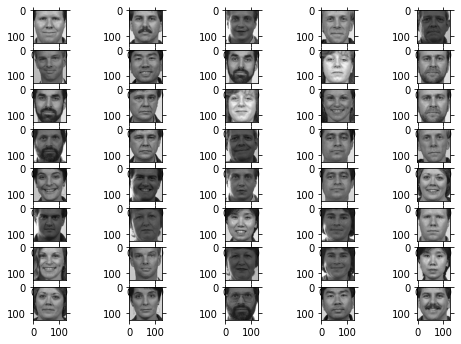

In [ ]:
for i in range(len(test_image_names)):
    img = imread(TEST_IMG_FOLDER + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

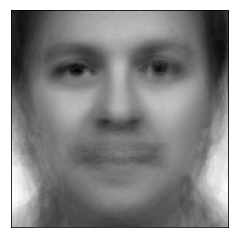

In [ ]:
#Tính toán mặt trung bình

mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

fig=plt.imshow(mean_face.reshape(height, width), cmap='gray')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
#Hiển thị các khuôn mặt được chuẩn hóa
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

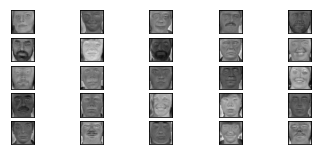

In [ ]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(8,5,1+i)
    fig=plt.imshow(img, cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
#Ma trận hiệp phương sai
cov_matrix=np.cov(normalised_training_tensor)
cov_matrix

In [ ]:
cov_matrix = np.divide(cov_matrix,25.0)
cov_matrix
print('Covariance Matrix Shape:', cov_matrix.shape)
#print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance Matrix Shape: (25, 25)


In [ ]:
#eigenvalues and eigenvectors
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('eigenvalues.shape: {} eigenvectors.shape: {}'.format(eigenvalues.shape, eigenvectors.shape))
#eigenvalues
#eigenvectors

eigenvalues.shape: (25,) eigenvectors.shape: (25, 25)


In [ ]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sắp xếp các cặp eigen theo thứ tự giảm dần:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

sorted_ind = sorted(range(eigenvalues.shape[0]), key=lambda k: eigenvalues[k], reverse=True)

eigvalues_sort = eigenvalues[sorted_ind]
eigvectors_sort = eigenvectors[sorted_ind]
train_set_files_sort = np.array(train_set_files)[sorted_ind]

In [ ]:
eigvalues_sort

array([ 5.95474297e+02,  2.61985607e+02,  1.99196155e+02,  1.38046358e+02,
        1.06654438e+02,  8.36768832e+01,  6.92684394e+01,  6.09597157e+01,
        5.60101049e+01,  5.12712854e+01,  3.95980421e+01,  3.21564277e+01,
        3.05468952e+01,  2.82065959e+01,  2.58998402e+01,  2.51388109e+01,
        2.42388743e+01,  2.32915571e+01,  2.07702326e+01,  1.94572336e+01,
        1.77889688e+01,  1.70149513e+01,  1.56284131e+01,  1.43752074e+01,
        1.40129299e+01,  1.24408290e+01,  1.19062885e+01,  1.11779541e+01,
        1.08200647e+01,  1.01683039e+01,  9.64701864e+00,  9.30551908e+00,
        8.70831517e+00,  7.88716351e+00,  7.67965781e+00,  7.21536849e+00,
        6.98836944e+00,  5.89079132e+00,  5.05070128e+00, -1.97167017e-14])

In [ ]:
#Chọn các thành phần chính cần thiết:
reduced_data = np.array(eigvectors_sort[:25]).transpose()
reduced_data.shape

(25, 25)

In [ ]:
print(normalised_training_tensor.transpose().shape, reduced_data.shape)

(16384, 25) (25, 25)


In [ ]:
#Tính toán eigenfaces

proj_data = np.dot(normalised_training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
proj_data.shape

(25, 16384)

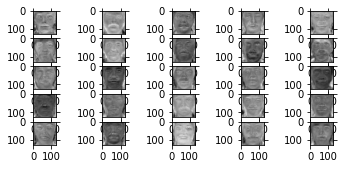

In [ ]:
#Plot eigen faces
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
#Tìm trọng số

w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
print(w.shape)
w

In [ ]:
#@title nhận dạng
def recogniser(test_image_names, train_image_names,proj_data,w, t0=2e8, prn=False):

    count        = 0
    num_images   = 0
    correct_pred = 0

    result = []
    wts = []

    #False match rate (FMR)
    FMR_count = 0

    #False non-match rate (FNMR)
    FNMR_count = 0


    test_image_names2 = sorted(test_image_names)

    for img in test_image_names2:

        unknown_face = plt.imread(TEST_IMG_FOLDER+img)
        num_images += 1

        unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
        normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

        w_unknown = np.dot(proj_data, normalised_uface_vector)
        diff  = w - w_unknown
        norms = np.linalg.norm(diff, axis=1)
        index = np.argmin(norms)

        wts.append([count, norms[index]])

        if prn: print('Input:'+'.'.join(img.split('.')[:2]), end='\t')
        count+=1

        match = img.split('_')[0] == train_image_names[index].split('_')[0]
        if norms[index] < t0: # It's a face
            if match:
                if prn: print('Matched:' + train_image_names[index], end = '\t')
                correct_pred += 1
                result.append(1)
            else:
                if prn: print('F/Matched:'+train_image_names[index], end = '\t')
                result.append(0)
                FMR_count += 1
        else:
            if match:
                if prn: print('Unknown face!'+train_image_names[index], end = '\t')
                FNMR_count +=1

            else:
                pass
                correct_pred += 1



        if prn: print(norms[index], end=' ')
        if prn: print()



    FMR = FMR_count/num_images
    FNMR = FNMR_count/num_images


    print('Correct predictions: {}/{} = {} \t\t'.format(correct_pred, num_images, correct_pred/num_images), end=' ')
    print('FMR: {} \t'.format(FMR), end=' ')
    print('FNMR: {} \t'.format(FNMR))



    return wts, result, correct_pred, num_images, FMR, FNMR


wts, result, correct_pred, num_images, FMR, FNMR =recogniser(test_image_names, train_image_names,proj_data,w, t0=2e8, prn=True)


Input:00770_960530_fa.jpg	Matched:00770_960530_fa.jpg	0.0 
Input:00770_960530_fa_a.jpg	F/Matched:00806_941205_fa.jpg	15371716.833444482 
Input:00771_941205_fa.jpg	Matched:00771_941205_fa.jpg	0.0 
Input:00771_941205_fb.jpg	Matched:00771_941205_fa.jpg	12136499.087737512 
Input:00772_941201_fa.jpg	Matched:00772_941201_fa.jpg	0.0 
Input:00772_941201_fb.jpg	Matched:00772_941201_fa.jpg	16565462.327559609 
Input:00773_941201_fa.jpg	Matched:00773_941201_fa.jpg	0.0 
Input:00773_941201_fb.jpg	Matched:00773_941201_fa.jpg	18297902.546494033 
Input:00775_941205_fa.jpg	Matched:00775_941205_fa.jpg	0.0 
Input:00775_941205_fb.jpg	Matched:00775_941205_fa.jpg	8136453.439292918 
Input:00779_941205_fa.jpg	Matched:00779_941205_fa.jpg	0.0 
Input:00779_941205_fb.jpg	Matched:00779_941205_fa.jpg	5337681.786809911 
Input:00781_941205_fa.jpg	Matched:00781_941205_fa.jpg	0.0 
Input:00781_941205_fb.jpg	Matched:00781_941205_fa.jpg	7006339.490587465 
Input:00787_941205_fa.jpg	Matched:00787_941205_fa.jpg	0.0 
Input:007

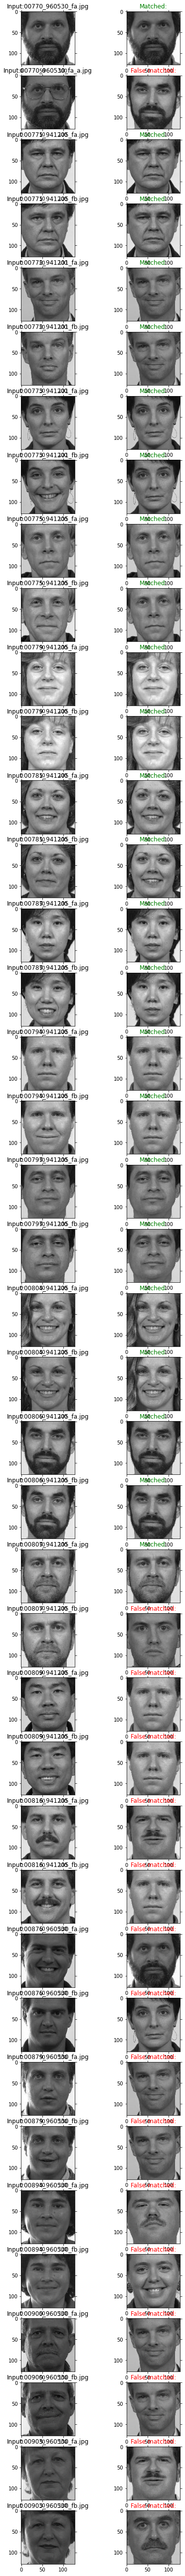

In [ ]:
#@title Trực quan hóa
count        = 0
num_images   = 0
correct_pred = 0
def Visualization(img, train_image_names,proj_data,w, t0):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread(TEST_IMG_FOLDER+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

    plt.subplot(40,2,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)




    plt.subplot(40,2,1+count)
    if norms[index] < t0: # It's a face

        match = img.split('_')[0] == train_image_names[index].split('_')[0]
        #if img.split('.')[0] == train_image_names[index].split('.')[0]:
        if match:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
            plt.title('Matched:', color='g')
            plt.imshow(imread(TRAIN_IMG_FOLDER+train_image_names[index]), cmap='gray')

            correct_pred += 1
        else:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
            plt.title('False matched:', color='r')
            plt.imshow(imread(TRAIN_IMG_FOLDER+train_image_names[index]), cmap='gray')
    else:
        #if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
        if img.split('_')[0] not in [i.split('_')[0] for i in train_image_names]:
            plt.title('Unknown face', color='g')
            correct_pred += 1
        else:
            plt.title('Unknown face', color='r')

    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)

    count+=1


fig = plt.figure(figsize=(5, 30))

test_image_names2 = sorted(test_image_names)
for i in range(len(test_image_names2)):
    Visualization(test_image_names2[i], train_image_names,proj_data,w, t0=2.7e7)

plt.show()